In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/retail_sales_dataset.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

In [32]:
# Overall Sales Performance
total_sales_amount = df['Total Amount'].sum()
total_quantity_sold = df['Quantity'].sum()

print(f"Total Sales Amount: ${total_sales_amount}")
print(f"Total Quantity Sold: {total_quantity_sold} units")

Total Sales Amount: $456000
Total Quantity Sold: 2514 units


<ipython-input-33-a3173f96b744>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Product Category', y='Total Amount',palette=['red', 'blue', 'orange'])


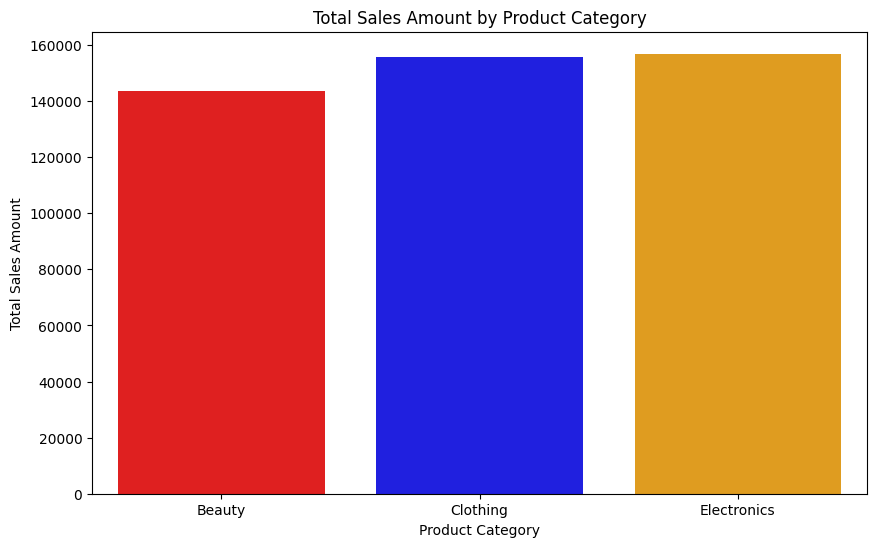

  Product Category  Total Amount  Quantity
0           Beauty        143515       771
1         Clothing        155580       894
2      Electronics        156905       849


In [33]:
# Visualization: Sales by Product Category
sales_by_category = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x='Product Category', y='Total Amount',palette=['red', 'blue', 'orange'])
plt.title('Total Sales Amount by Product Category')
plt.ylabel('Total Sales Amount')
plt.xlabel('Product Category')
plt.show()



print(sales_by_category)

   Gender  Total Amount
0  Female        232840
1    Male        223160
        Age  Total Amount
0  (18, 30]        121730
1  (30, 40]         95950
2  (40, 50]         93795
3  (50, 60]        100085
4  (60, 70]         33225


<ipython-input-34-b585e4b020e7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_age_group, x='Age', y='Total Amount',palette=['yellow', 'red', 'orange','green', 'blue'])


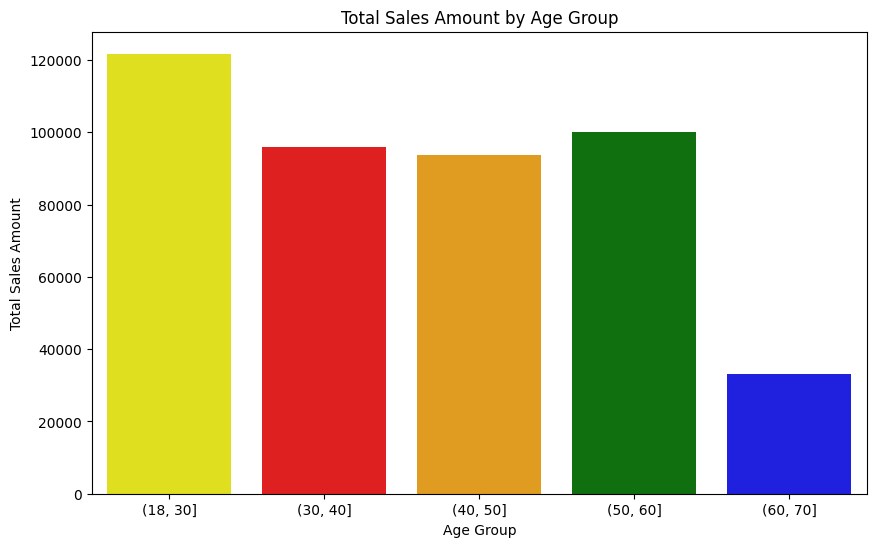

In [34]:
# Sales by Customer Demographics
sales_by_gender = df.groupby('Gender').agg({'Total Amount': 'sum'}).reset_index()
sales_by_age_group = df.groupby(pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70])).agg({'Total Amount': 'sum'}).reset_index()

print(sales_by_gender)
print(sales_by_age_group)

# Visualization: Sales by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_age_group, x='Age', y='Total Amount',palette=['yellow', 'red', 'orange','green', 'blue'])
plt.title('Total Sales Amount by Age Group')
plt.ylabel('Total Sales Amount')
plt.xlabel('Age Group')
plt.show()

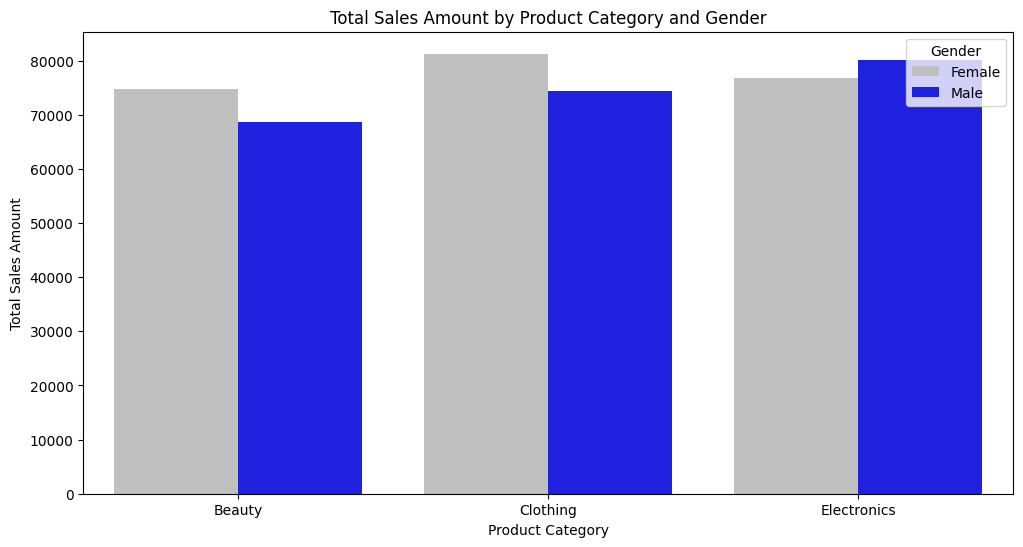

  Product Category  Gender  Total Amount
0           Beauty  Female         74830
1           Beauty    Male         68685
2         Clothing  Female         81275
3         Clothing    Male         74305
4      Electronics  Female         76735
5      Electronics    Male         80170


In [35]:
# Visualization: Sales by Product Category and Gender
sales_by_category_gender = df.groupby(['Product Category', 'Gender']).agg({
    'Total Amount': 'sum'
}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_category_gender, x='Product Category', y='Total Amount', hue='Gender', palette=['silver', 'blue'])
plt.title('Total Sales Amount by Product Category and Gender')
plt.ylabel('Total Sales Amount')
plt.xlabel('Product Category')
plt.legend(title='Gender')
plt.show()
print(sales_by_category_gender)

In [36]:
# Time Series Analysis
df['Month'] = df['Date'].dt.to_period('M')
sales_over_time = df.groupby('Month').agg({'Total Amount': 'sum'}).reset_index()
sales_over_time['Month'] = sales_over_time['Month'].astype(str)

print(sales_over_time)

      Month  Total Amount
0   2023-01         35450
1   2023-02         44060
2   2023-03         28990
3   2023-04         33870
4   2023-05         53150
5   2023-06         36715
6   2023-07         35465
7   2023-08         36960
8   2023-09         23620
9   2023-10         46580
10  2023-11         34920
11  2023-12         44690
12  2024-01          1530


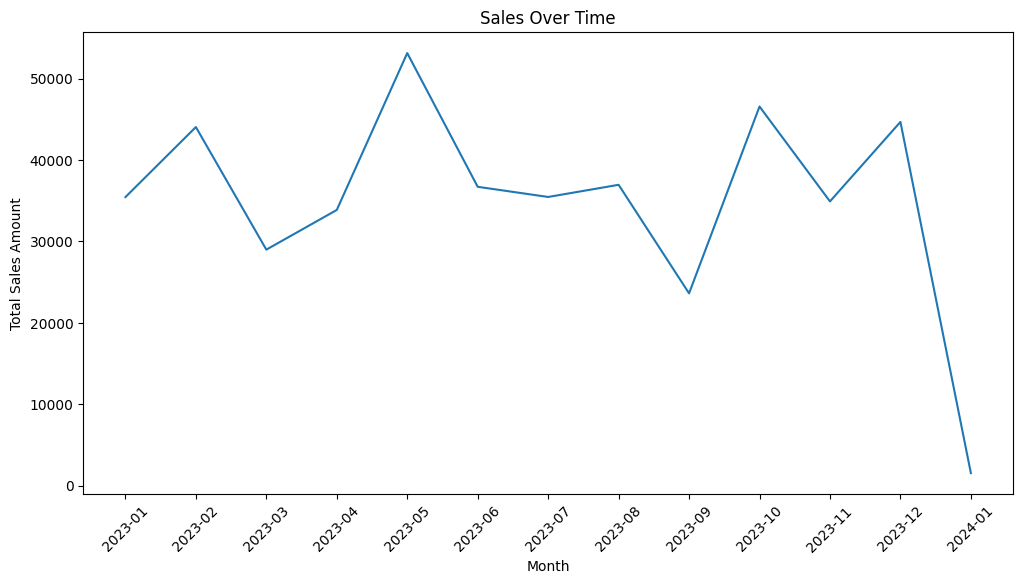

In [37]:
# Visualization: Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Month', y='Total Amount')
plt.title('Sales Over Time')
plt.ylabel('Total Sales Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-fb0fc2d4d171>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_over_time, x='Month', y='Total Amount', palette='viridis')


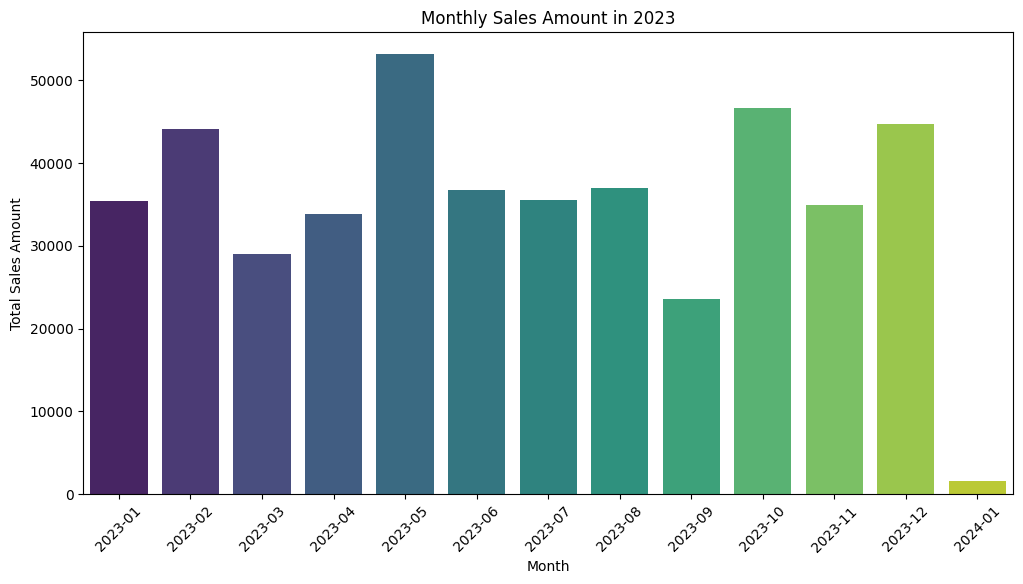

In [38]:
# Visualization: Sales Over Months in 2023
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_over_time, x='Month', y='Total Amount', palette='viridis')
plt.title('Monthly Sales Amount in 2023')
plt.ylabel('Total Sales Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

Average Transaction Value: $456.00


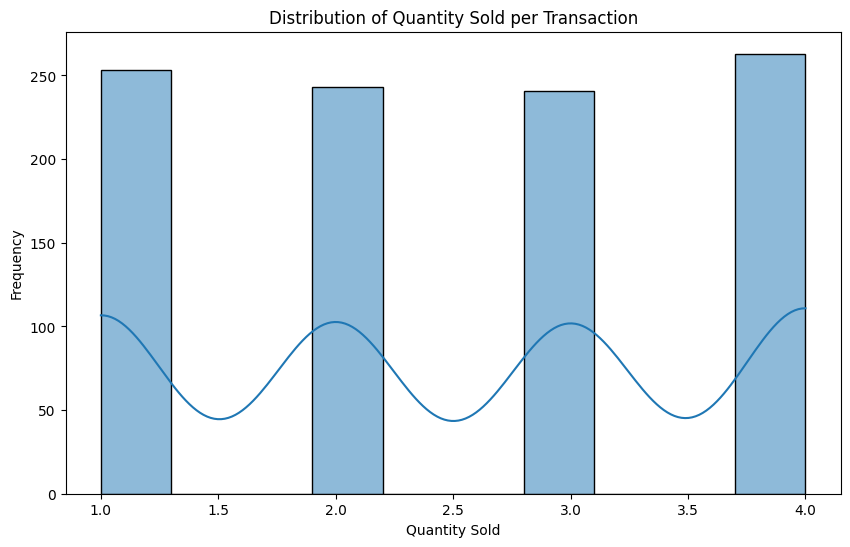

In [39]:
# Average Transaction Value
average_transaction_value = df['Total Amount'].mean()

print(f"Average Transaction Value: ${average_transaction_value:.2f}")

# Quantity Sold Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=10, kde=True)
plt.title('Distribution of Quantity Sold per Transaction')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()